# Stock Trading

The cell below defines the **abstract class** whose API you need to implement. **Do NOT modify it** - use the dedicated cell further below for your implementation instead.

In [25]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  
      

# abstract class to represent a stock trading platform
class AbstractStockTradingPlatform(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # adds transactionRecord to the set of completed transactions
    @abstractmethod
    def logTransaction(self, transactionRecord):
        pass

    # returns a list with all transactions of a given stockName,
    # sorted by increasing trade value. 
    # stockName : str
    @abstractmethod
    def sortedTransactions(self, stockName): 
        sortedList = []
        return sortedList    
    
    # returns a list of transactions of a given stockName with minimum trade value
    # stockName : str
    @abstractmethod
    def minTransactions(self, stockName): 
        minList = []
        return minList    
    
    # returns a list of transactions of a given stockName with maximum trade value
    # stockName : str
    @abstractmethod
    def maxTransactions(self, stockName): 
        maxList = []
        return maxList    

    # returns a list of transactions of a given stockName, 
    # with the largest trade value below a given thresholdValue.  
    # stockName : str
    # thresholdValue : double
    @abstractmethod
    def floorTransactions(self, stockName, thresholdValue): 
        floorList = []
        return floorList    

    # returns a list of transactions of a given stockName, 
    # with the smallest trade value above a given thresholdValue.  
    # stockName : str
    # thresholdValue : double
    @abstractmethod
    def ceilingTransactions(self, stockName, thresholdValue): 
        ceilingList = []
        return ceilingList    

        
    # returns a list of transactions of a given stockName,  
    # whose trade value is within the range [fromValue, toValue].
    # stockName : str
    # fromValue : double
    # toValue : double
    @abstractmethod
    def rangeTransactions(self, stockName, fromValue, toValue): 
        rangeList = []
        return rangeList    

Use the cell below to define any data structure and auxiliary python function you may need. Leave the implementation of the main API to the next code cell instead.

In [26]:
class Node:
    def __init__(self,record,value,isRed = False,parent = None):
        self.records = [record]
        self.value = value
        self.left = None    # left child
        self.right = None   # right child
        self.isRed = isRed  # is colour of link to it red
        self.parent = parent

    def rotateLeft(self):
        # put self's right-child in self's place and realign to fit
        # this keeps the red links on the left while maintaing tree structure
        x = self.right
        if self.parent:
            if self == self.parent.right:
                self.parent.right = x
            else:
                self.parent.left = x
        self.right = x.left
        if self.right:
            self.right.parent = self
        x.left = self
        x.isRed = False
        self.isRed = True   # self to x link still red
        x.parent = self.parent
        self.parent = x
    
        
    def rotateRight(self):
        # put self's left-child in self's place and realign to fit
        # this prevents two red links occuring in a row
        x = self.parent
        if x.parent:
            if x == x.parent.right:
                x.parent.right = self
            else:
                x.parent.left = self
        x.left = self.right
        if x.left:
            x.left.parent = x
        self.right = x
        self.isRed = False
        x.isRed = True
        self.parent = x.parent
        x.parent = self

    def recolour(self):
        # flip where the red links are
        if self.parent:
            self.isRed = True
        self.left.isRed = False
        self.right.isRed = False

    def root(self):
        # finds root of tree before functions are called
        current = self
        while current.parent:
            current = current.parent
        return current

    def isColourRed(self,child):
        if child=="left.left":
            if self.left:
                x = self.left.left
            else:
                return False
        if child=="left":  x = self.left
        if child=="right":  x = self.right

        if x is None:
            return False
        else:
            return x.isRed


    def put(self,record,value):
        root = self.root()
        current = root
        while True:
            # regular BST input
            if value == current.value:
                current.records.append(record)
            elif value < current.value:
                if current.left is None:
                    current.left = Node(record,value,True,current)
                        # nb. current is the parent of new Node
                else:
                    current = current.left
                    continue
            elif value > current.value:
                if current.right is None:
                    current.right = Node(record,value,True,current)
                else:
                    current = current.right
                    continue
            break
    
        # maintain the structure of a LLRB BST
        while True:
            changes = 0
            if (current.isColourRed("right")) and not (current.isColourRed("left")):
                if not current.isRed:
                    # keep the red links on the left
                    current.rotateLeft()
                else:
                    # change around parents
                    current.rotateLeft()
                    current.parent.rotateRight()
                changes+=1
            if current.isColourRed("left") and current.isRed:
                # no two red links in a row
                current.rotateRight()
                changes+=1
            if current.isColourRed("left") and current.isColourRed("right"):
                # both children have red links -> parent has red link
                current.recolour()
                changes+=1
            if (current.parent is None) or (changes == 0): # reached the root
                break
            else:
                current = current.parent

    def min(self):          # ITERATIVE
        # traverse as far leftwards from the root
        current = self.root()
        while current.left:
            current = current.left
        return current.records

    def max(self):          # ITERATIVE
        # traverse as far rightwards from the root
        current = self.root()
        while current.right:
            current = current.right
        return current.records

    def floor(self,value):  # ITERATIVE
        # record with largest value smaller than threshold
        # traverse as far right provided the value is <= Node's value
        current = self.root()
        potentialVal = None
        while True:
            if current.value == value:
                return current.records
            elif current.value > value:
                if current.left:
                    if potentialVal == current.value:
                        potentialVal = current.left.value
                    current = current.left
                    continue
                else:
                    # no records below threshold value
                    return potentialVal
            else:
                if current.right:
                    if current.right.value >= value:
                        # between current and current.right
                        potentialVal = current.value
                        current = current.right
                        continue
                    else:
                        current = current.right
                        potentialVal = current.value
                        continue
                else:
                    return current.records


    def ceiling(self,value):    # ITERATIVE
        # record with smallest value larger than threshold
        # traverse as far left provided the value is >= Node's value
        current = self.root()
        potentialVal = None
        while True:
            if current.value == value:
                return current.records
            elif current.value < value:
                if current.right:
                    if potentialVal == current.value:
                        potentialVal = current.right.value
                    current = current.right
                    continue
                else:
                    # no records above threshold value
                    return potentialVal
            else:
                if current.left:
                    if current.left.value <= value:
                        # between current and current.left
                        potentialVal = current.value
                        current = current.left
                        continue
                    else:
                        current = current.left
                        potentialVal = current.value
                        continue
                else:
                    return current.records


    def sorted(self):       # RECURSIVE
        sorted_records = []
        if self.value is None:  # what is all this???
            return None
        else:
            rt = self.root()
            rt.sortedAux(sorted_records)
            return sorted_records
    def sortedAux(self,sorted_records):
        # sort left side of the tree
        if self.left:
            self.left.sortedAux(sorted_records)

        for record in self.records:
            sorted_records.append(record)

        # sort right side of the tree
        if self.right:
            self.right.sortedAux(sorted_records)


    def range(self,fromVal,toVal):  # RECURSIVE
        # run a modified sorted() algorithm, discluding values not in range
        range_records = []
        if self.value is None:
            return None
        else:
            rt = self.root()
            rt.rangeAux(fromVal,toVal,range_records)
            return range_records
    def rangeAux(self,fromVal,toVal,range_records):
        
        if fromVal <= self.value <= toVal:
            if self.left:
                self.left.rangeAux(fromVal,toVal,range_records)

            for record in self.records:
                range_records.append(record)

            if self.right:
                self.right.rangeAux(fromVal,toVal,range_records)
        elif toVal < self.value:
            if self.left:
                self.left.rangeAux(fromVal,toVal,range_records)
            else:
                return
        elif self.value < fromVal:
            if self.right:
                self.right.rangeAux(fromVal,toVal,range_records)
            else:
                return


    def range(self,fromVal,toVal):  # RECURSIVE
        # run a modified sorted() algorithm, discluding values not in range
        range_records = []
        if self.value is None:
            return None
        else:
            rt = self.root()
            rt.rangeAux(fromVal,toVal,range_records)
            return range_records
    def rangeAux(self,fromVal,toVal,range_records):
        
        if fromVal <= self.value <= toVal:
            if self.left:
                self.left.rangeAux(fromVal,toVal,range_records)

            for record in self.records:
                range_records.append(record)

            if self.right:
                self.right.rangeAux(fromVal,toVal,range_records)
        elif toVal < self.value:
            if self.left:
                self.left.rangeAux(fromVal,toVal,range_records)
            else:
                return
        elif self.value < fromVal:
            if self.right:
                self.right.rangeAux(fromVal,toVal,range_records)
            else:
                return


Use the cell below to implement the requested API. 

In [27]:
# IMPLEMENT HERE THE REQUESTED API

class RedBlack:
    def __init__(self, tree,minimum,maximum):
        self.tree = tree
        self.minimum = [minimum]
        self.maximum = [maximum]

class StockTradingPlatform(AbstractStockTradingPlatform):
    # use class instead of array - only change is readability
    def __init__(self):
        self.transactions = {}

    def logTransaction(self,record):
        name = record[0]
        pricePerStock = record[1]
        quantity = record[2]
        timestamp = record[3]

        tradeValue = pricePerStock * quantity
        recordData = [pricePerStock, quantity, timestamp]
       
        if name in self.transactions:
            self.transactions[name].tree.put(recordData,tradeValue)


            # compare to current min and max. This makes minTransaction() and maxTransaction()
            # linear instead of logarithmic by only storing one extra array for each
            minimum = self.transactions[name].minimum
            maximum = self.transactions[name].maximum

            minVal = minimum[0][0] * minimum[0][1]
            maxVal = maximum[0][0] * maximum[0][1]

            if (minVal > tradeValue):
                # this record becomes the new minimum
                self.transactions[name].minimum = [recordData]
            elif (minVal == tradeValue):
                # ALSO a record with a minimum trade value
                self.transactions[name].minimum.append(recordData)
            if (maxVal < tradeValue):
                # this record becomes the new maximum
                self.transactions[name].maximum = [recordData]
            elif (maxVal == tradeValue):
                # ALSO a record with a maximum trade value
                self.transactions[name].maximum.append(recordData)
           
        else:
            self.transactions[name] = RedBlack(Node(recordData,tradeValue),recordData,recordData)

    def minTransactions(self,stockname):
        # retrieve RedBlack object attribute - constant
        if stockname in self.transactions:
            return self.transactions[stockname].minimum

    def maxTransactions(self,stockname):
        # retrieve RedBlack object attribute - constant
        if stockname in self.transactions:
            return self.transactions[stockname].maximum

    def floorTransactions(self,stockname,thresholdVal):
        if stockname in self.transactions:
            return self.transactions[stockname].tree.floor(thresholdVal)

    def ceilingTransactions(self,stockname,thresholdVal):
        if stockname in self.transactions:
            return self.transactions[stockname].tree.ceiling(thresholdVal)

    def sortedTransactions(self,stockname):
        if stockname in self.transactions:
            return self.transactions[stockname].tree.sorted()

    def rangeTransactions(self,stockname,fromVal,toVal):
        if stockname in self.transactions:     
            maximum = self.transactions[stockname].maximum
            minimum = self.transactions[stockname].minimum

            maxVal = maximum[0][0] * maximum[0][1]
            minVal = minimum[0][0] * minimum[0][1]

            if fromVal > maxVal or toVal < minVal:
                return []
            return self.transactions[stockname].tree.range(fromVal,toVal)

The cell below provides helper code that you can use within your experimental framework to generate random transaction data. **Do NOT modify it**.

In [28]:
# DO NOT MODIFY THIS CELL

import random
from datetime import timedelta
from datetime import datetime

class TransactionDataGenerator:
    def __init__(self):
        self.stockNames = ["Barclays", "HSBA", "Lloyds Banking Group", "NatWest Group", 
                      "Standard Chartered", "3i", "Abrdn", "Hargreaves Lansdown", 
                      "London Stock Exchange Group", "Pershing Square Holdings", 
                      "Schroders", "St. James's Place plc."]
        self.minTradeValue = 500.00
        self.maxTradeValue = 100000.00
        self.startDate = datetime.strptime('1/1/2022 1:00:00', '%d/%m/%Y %H:%M:%S')
        random.seed(20221603)
          
    # returns the name of a traded stock at random
    def getStockName(self):
        return random.choice(self.stockNames)

    # returns the trade value of a transaction at random
    def getTradeValue(self):
        return round(random.uniform(self.minTradeValue, self.maxTradeValue), 2)
    
    # returns a list of N randomly generated transactions,
    # where each transaction is represented as a list [stock name, price, quantity, timestamp]
    # N : int
    def generateTransactionData(self, N):   
        listTransactions = [[]]*N
        listDates = [self.startDate + timedelta(seconds=3*x) for x in range(0, N)]
        listDatesFormatted = [x.strftime('%d/%m/%Y %H:%M:%S') for x in listDates]
        for i in range(N):
            stockName = random.choice(self.stockNames)
            price = round(random.uniform(50.00, 100.00), 2)
            quantity = random.randint(10,1000)
            listTransactions[i] = [stockName, price, quantity, listDatesFormatted[i]]   
        return listTransactions

Use the cell below for the python code needed to realise your **experimental framework** (i.e., to generate test data, to instante the `StockTrading` class, to thorouhgly experiment with its API functions, and to experimentally measure their performance). You may use the previously provided ``TransactionDataGenerator`` class to generate random transaction data.

In [29]:
import random
import timeit

# ADD YOUR EXPERIMENTAL FRAMEWORK CODE HERE

def average(array): # used to caluclate the mean time taken to execute each API function
    total = 0
    length = len(array)
    for item in array:
        total += item
    average = total / length
    return average

# Average Case 
averageCaseTestPlatform = StockTradingPlatform() # the stock trading platform that is going to be used to test for the average case.
testDataGenerator = TransactionDataGenerator()
target = 500_000 # specifies number of transactions to be added to stock trading platform
current_ac = 0 # counter to be used to initialise the data set
N_ac = [] # Stores the number of transactions in the array based on index position. 1000, 2000, 3000, ..., 498_000, 499_000, 500_000.
T_ac = [[],[],[],[],[],[],[]] # 0 = Log Transaction, 1 = Sorted, 2 = Max, 3 = Min, 4 = Floor, 5 = Ceiling, 6 = Range

unsortedTestData = testDataGenerator.generateTransactionData(500000)
sortedTestData = sorted(unsortedTestData, key = lambda x : x[1] * x[2])
sortedTestData.reverse()

averageCaseTestData = []
while current_ac < target:
    temp = []
    for i in range(1000):
        temp.append(sortedTestData[current_ac + i])
    averageCaseTestData.append(temp)
    current_ac += 1000
    N_ac.append(current_ac)

print("Average Case Test Data")
for i in range(len(averageCaseTestData)):
    print(str((100000 * i)/ target) + "%")

    # Log Transaction 
    results = []
    for j in range(0, 50):
        start = timeit.default_timer() 
        for transaction in averageCaseTestData[i]:
            averageCaseTestPlatform.logTransaction(transaction)
        end = timeit.default_timer()
        diff = end - start # calculates difference between start time and end time to determine the time taken to execute the API function.
        results.append(diff)
    T_ac[0].append(average(results))

    # Sorted
    results = []
    for j in range(0, 50):
        randomStockName = testDataGenerator.getStockName()
        start = timeit.default_timer()
        averageCaseTestPlatform.sortedTransactions(randomStockName)
        end = timeit.default_timer()
        diff = end - start 
        results.append(diff)
    T_ac[1].append(average(results))

    # Max
    results = []
    for j in range(0, 50):
        randomStockName = testDataGenerator.getStockName()
        start = timeit.default_timer()
        averageCaseTestPlatform.maxTransactions(randomStockName)
        end = timeit.default_timer()
        diff = end - start
        results.append(diff)
    T_ac[2].append(average(results))

    # Min 
    results = []
    for j in range(0, 50):
        randomStockName = testDataGenerator.getStockName()
        start = timeit.default_timer()
        averageCaseTestPlatform.minTransactions(randomStockName)
        end = timeit.default_timer()
        diff = end - start
        results.append(diff)
    T_ac[3].append(average(results))

    # Floor
    results = []
    for j in range(0, 50):
        randomStockName = testDataGenerator.getStockName()
        start = timeit.default_timer()
        averageCaseTestPlatform.floorTransactions(randomStockName, 0)
        end = timeit.default_timer()
        diff = end - start
        results.append(diff)
    T_ac[4].append(average(results))

    # Ceiling
    results = []
    for j in range(0, 50):
        randomStockName = testDataGenerator.getStockName()
        start = timeit.default_timer()
        averageCaseTestPlatform.ceilingTransactions(randomStockName, 0)
        end = timeit.default_timer()
        diff = end - start
        results.append(diff)
    T_ac[5].append(average(results))

    # Range
    results = []
    for j in range(0, 50):
        randomStockName = testDataGenerator.getStockName()
        tradeValue1 = testDataGenerator.getTradeValue()
        tradeValue2 = testDataGenerator.getTradeValue()
        if tradeValue1 <= tradeValue2:
            start = timeit.default_timer()
            averageCaseTestPlatform.rangeTransactions(randomStockName, tradeValue1, tradeValue2)
            end = timeit.default_timer()
        else: 
            start = timeit.default_timer()
            averageCaseTestPlatform.rangeTransactions(randomStockName, tradeValue2, tradeValue1)
            end = timeit.default_timer()
        diff = end - start
        results.append(diff)
    T_ac[6].append(average(results))

# Worst Case
worstCaseTestPlatform = StockTradingPlatform()
current_wc = 0
N_wc = []
T_wc = [[], [], [], [], [], [], []] # 0 = Log Transaction, 1 = Sorted, 2 = Max, 3 = Min, 4 = Floor, 5 = Ceiling, 6 = Range

worstCaseTestData = []
while current_wc < target:
    temp = []
    for i in range(1000):
        temp.append(unsortedTestData[current_wc + i])
    worstCaseTestData.append(temp)
    current_wc += 1000
    N_wc.append(current_wc)

print("Worst Case Test Data")
for i in range(len(worstCaseTestData)):
    print(str((100000 * i)/ target) + "%")

    # Log Transaction  
    results = []
    for j in range(0, 50):
        start = timeit.default_timer()
        for transaction in worstCaseTestData[i]:
            worstCaseTestPlatform.logTransaction(transaction)
        end = timeit.default_timer()
        diff = end - start
        results.append(diff)
    T_wc[0].append(average(results))

    # Sorted
    results = []
    for j in range(0, 50):
        randomStockName = testDataGenerator.getStockName()
        start = timeit.default_timer()
        worstCaseTestPlatform.sortedTransactions(randomStockName)
        end = timeit.default_timer()
        diff = end - start 
        results.append(diff)
    T_wc[1].append(average(results))

    # Max
    results = []
    for j in range(0, 50):
        randomStockName = testDataGenerator.getStockName()
        start = timeit.default_timer()
        worstCaseTestPlatform.maxTransactions(randomStockName)
        end = timeit.default_timer()
        diff = end - start
        results.append(diff)
    T_wc[2].append(average(results))

    # Min 
    results = []
    for j in range(0, 50):
        randomStockName = testDataGenerator.getStockName()
        start = timeit.default_timer()
        worstCaseTestPlatform.minTransactions(randomStockName)
        end = timeit.default_timer()
        diff = end - start
        results.append(diff)
    T_wc[3].append(average(results))

    # Floor
    results = [] 
    for j in range(0, 50):
        randomThresholdValue = testDataGenerator.getTradeValue()
        randomStockName = testDataGenerator.getStockName()
        start = timeit.default_timer()
        worstCaseTestPlatform.floorTransactions(randomStockName, randomThresholdValue)
        end = timeit.default_timer()
        diff = end - start
        results.append(diff)
    T_wc[4].append(average(results))

    # Ceiling
    results = []
    for j in range(0, 50):
        randomThresholdValue = testDataGenerator.getTradeValue()
        randomStockName = testDataGenerator.getStockName()
        start = timeit.default_timer()
        worstCaseTestPlatform.ceilingTransactions(randomStockName, randomThresholdValue)
        end = timeit.default_timer()
        diff = end - start
        results.append(diff)
    T_wc[5].append(average(results))

    # Range
    results = []
    for j in range(0, 50):
        randomStockName = testDataGenerator.getStockName()
        start = timeit.default_timer()
        worstCaseTestPlatform.rangeTransactions(randomStockName, 500, 100000) 
        end = timeit.default_timer()
        diff = end - start
        results.append(diff)
    T_wc[6].append(average(results))



Average Case Test Data
0.0%
0.2%
0.4%
0.6%
0.8%
1.0%
1.2%
1.4%
1.6%
1.8%
2.0%
2.2%
2.4%
2.6%
2.8%
3.0%
3.2%
3.4%
3.6%
3.8%
4.0%
4.2%
4.4%
4.6%
4.8%
5.0%
5.2%
5.4%
5.6%
5.8%
6.0%
6.2%
6.4%
6.6%
6.8%
7.0%
7.2%
7.4%
7.6%
7.8%
8.0%
8.2%
8.4%
8.6%
8.8%
9.0%
9.2%
9.4%
9.6%
9.8%
10.0%
10.2%
10.4%
10.6%
10.8%
11.0%
11.2%
11.4%
11.6%
11.8%
12.0%
12.2%
12.4%
12.6%
12.8%
13.0%
13.2%
13.4%
13.6%
13.8%
14.0%
14.2%
14.4%
14.6%
14.8%
15.0%
15.2%
15.4%
15.6%
15.8%
16.0%
16.2%
16.4%
16.6%
16.8%
17.0%
17.2%
17.4%
17.6%
17.8%
18.0%
18.2%
18.4%
18.6%
18.8%
19.0%
19.2%
19.4%
19.6%
19.8%
20.0%
20.2%
20.4%
20.6%
20.8%
21.0%
21.2%
21.4%
21.6%
21.8%
22.0%
22.2%
22.4%
22.6%
22.8%
23.0%
23.2%
23.4%
23.6%
23.8%
24.0%
24.2%
24.4%
24.6%
24.8%
25.0%
25.2%
25.4%
25.6%
25.8%
26.0%
26.2%
26.4%
26.6%
26.8%
27.0%
27.2%
27.4%
27.6%
27.8%
28.0%
28.2%
28.4%
28.6%
28.8%
29.0%
29.2%
29.4%
29.6%
29.8%
30.0%
30.2%
30.4%
30.6%
30.8%
31.0%
31.2%
31.4%
31.6%
31.8%
32.0%
32.2%
32.4%
32.6%
32.8%
33.0%
33.2%
33.4%
33.6%
33.8%
34.0%
3

The cell below exemplifies **debug** code I will invoke on your submission - it does not represent an experimental framework (which should me much more comprehensive). **Do NOT modify it**. 

In [30]:
# DO NOT MODIFY THIS CELL

import timeit

testPlatform = StockTradingPlatform()
testDataGen = TransactionDataGenerator()

numTransactions = 1000000
testData = testDataGen.generateTransactionData(numTransactions)

numRuns = 100

print("Examples of transactions:", testData[0], testData[numTransactions//2], testData[numTransactions-1])

#
# testing the logTransaction() API 
#
starttime = timeit.default_timer()
for i in range(numTransactions):
    testPlatform.logTransaction(testData[i])
endtime = timeit.default_timer()
print("\nExecution time to load", numTransactions, "transactions:", round(endtime-starttime,4))

#
# testing the various API functions
#
starttime = timeit.default_timer()
for i in range(numRuns):
    output = testPlatform.sortedTransactions(testDataGen.getStockName())
endtime = timeit.default_timer()
print("\nMean execution time sortedTransactions:", round((endtime-starttime)/numRuns,4))

starttime = timeit.default_timer()
for i in range(numRuns):
    output = testPlatform.minTransactions(testDataGen.getStockName())
endtime = timeit.default_timer()
print("\nMean execution time minTransactions:", round((endtime-starttime)/numRuns,4))

starttime = timeit.default_timer()
for i in range(numRuns):
    output = testPlatform.maxTransactions(testDataGen.getStockName())
endtime = timeit.default_timer()
print("\nMean execution time maxTransactions:", round((endtime-starttime)/numRuns,4))


starttime = timeit.default_timer()
for i in range(numRuns):
    output = testPlatform.floorTransactions(testDataGen.getStockName(), testDataGen.getTradeValue())
endtime = timeit.default_timer()
print("\nMean execution time floorTransactions:", round((endtime-starttime)/numRuns,4))


starttime = timeit.default_timer()
for i in range(numRuns):
    output = testPlatform.ceilingTransactions(testDataGen.getStockName(), testDataGen.getTradeValue())
endtime = timeit.default_timer()
print("\nMean execution time ceilingTransactions:", round((endtime-starttime)/numRuns,4))


starttime = timeit.default_timer()
for i in range(numRuns):
    rangeValues = sorted([testDataGen.getTradeValue(), testDataGen.getTradeValue()])
    output = testPlatform.rangeTransactions(testDataGen.getStockName(), rangeValues[0], rangeValues[1])
endtime = timeit.default_timer()
print("\nMean execution time rangeTransactions:", round((endtime-starttime)/numRuns,4))

Examples of transactions: ['NatWest Group', 51.89, 96, '01/01/2022 01:00:00'] ['Barclays', 59.84, 245, '18/01/2022 09:40:00'] ['Pershing Square Holdings', 84.27, 319, '04/02/2022 18:19:57']

Execution time to load 1000000 transactions: 19.2857

Mean execution time sortedTransactions: 0.0439

Mean execution time minTransactions: 0.0

Mean execution time maxTransactions: 0.0

Mean execution time floorTransactions: 0.0

Mean execution time ceilingTransactions: 0.0

Mean execution time rangeTransactions: 0.0209


In [31]:
# The code below is to clean the collected data by removing anomalies.

def findLowerBound(array):
    temp = array
    temp = sorted(temp)
    Q1 = temp[round(len(temp) * 1/4)]
    Q3 = temp[round(len(temp) * 3/4)]
    IQR = Q3 - Q1
    return Q1 - 1.5 * IQR
    
def findUpperBound(array):
    temp = array
    temp = sorted(temp)
    Q1 = temp[round(len(temp) * 1/4)]
    Q3 = temp[round(len(temp) * 3/4)]
    IQR = Q3 - Q1
    return Q3 + 1.5 * IQR

averageCasePlottingData = []
worstCasePlottingData = []

for i in range(len(T_ac)):
    upperbound_ac = findUpperBound(T_ac[i])
    lowerbound_ac = findLowerBound(T_ac[i])
    upperbound_wc = findUpperBound(T_wc[i])
    lowerbound_wc = findLowerBound(T_wc[i])

    temp_ac = [[], []]
    temp_wc = [[], []]

    for j in range(len(T_ac[i])):
        if (T_ac[i][j] >= lowerbound_ac and T_ac[i][j] <= upperbound_ac) and (T_wc[i][j] >= lowerbound_wc and T_wc[i][j] <= upperbound_wc):
            temp_ac[0].append(N_ac[j])
            temp_ac[1].append(T_ac[i][j])
            temp_wc[0].append(N_wc[j])
            temp_wc[1].append(T_wc[i][j])
        
    averageCasePlottingData.append(temp_ac)
    worstCasePlottingData.append(temp_wc)



/var/folders/v_/cyb366v93q5ccg7bf5s5q8s80000gn/T/ipykernel_3334/2287082688.py:15: RuntimeWarning: invalid value encountered in log
  return  a * np.log(b * x)


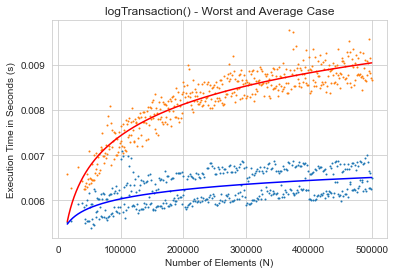

Average Case
y = 0.00029420089510516343log(8071.595204686294)
Worst Case
y = 0.0010011261265424633log(0.016746683594672414)


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit

# Log Transaction

plt.title("logTransaction() - Worst and Average Case")
plt.xlabel("Number of Elements (N)")
plt.ylabel("Execution Time in Seconds (s)")
sns.set_style(style="whitegrid")


def func(x, a, b):
    return  a * np.log(b * x) 

def initNewX():
    new_x = []
    current = 0
    while current <= target:
        current += 1000
        new_x.append(current)
    return new_x

def initNewY(x_data, a, b):
    new_y = []
    for x in x_data:
        y = func(x, a, b)
        new_y.append(y)
    return new_y

# Average Case Curve

x_values_ac = averageCasePlottingData[0][0]
y_values_ac = averageCasePlottingData[0][1]

popt_ac, _ = curve_fit(func, x_values_ac, y_values_ac) # we ignore the covariance matrix for the estimated parameters
a_ac, b_ac = popt_ac
x_new_ac = initNewX()
y_new_ac = initNewY(x_new_ac, a_ac, b_ac)

x_line_ac = np.arange(min(x_values_ac), max(x_values_ac), 1)
y_line_ac = func(x_line_ac, a_ac, b_ac)

# Worst Case Curve

x_values_wc = worstCasePlottingData[0][0]
y_values_wc = worstCasePlottingData[0][1]

popt_wc, _ = curve_fit(func, x_values_wc, y_values_wc) # we ignore the covariance matrix for the estimated parameters
a_wc, b_wc = popt_wc
x_new_wc = initNewX()
y_new_wc = initNewY(x_new_wc, a_wc, b_wc)

x_line_wc = np.arange(min(x_values_wc), max(x_values_wc), 1)
y_line_wc = func(x_line_ac, a_wc, b_wc)

plt.plot(x_values_ac, y_values_ac, ls="", marker=".", markerfacecolor = "blue", markersize = 2)
plt.plot(x_line_ac, y_line_ac, "-", color="blue")
plt.plot(x_values_wc, y_values_wc, ls="", marker=".", markerfacecolor = "red", markersize = 2)
plt.plot(x_line_wc, y_line_wc, "-", color="red")

plt.show()

print("Average Case")
print("y = " + str(a_ac) + "log(" + str(b_ac)+ ")")

print("Worst Case")
print("y = " + str(a_wc) + "log(" + str(b_wc) + ")")

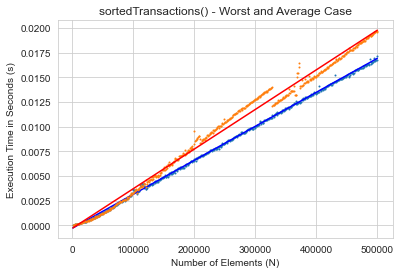

Average Case
y = 3.447467760019911e-08x + -0.00030681209553835723
Worst Case
y = 4.018225666686713e-08x + -0.00031002064740548034


In [33]:

# Sorted

plt.title("sortedTransactions() - Worst and Average Case")
plt.xlabel("Number of Elements (N)")
plt.ylabel("Execution Time in Seconds (s)")


def func(x, a, b):
    return  a * x + b

def initNewX():
    new_x = []
    current = 0
    while current <= target:
        current += 1000
        new_x.append(current)
    return new_x

def initNewY(x_data, a, b):
    new_y = []
    for x in x_data:
        y = func(x, a, b)
        new_y.append(y)
    return new_y

# Average Case Line

x_values_ac = averageCasePlottingData[1][0]
y_values_ac = averageCasePlottingData[1][1]

popt_ac, _ = curve_fit(func, x_values_ac, y_values_ac) # we ignore the covariance matrix for the estimated parameters
a_ac, b_ac = popt_ac
x_new_ac = initNewX()
y_new_ac = initNewY(x_new_ac, a_ac, b_ac)

x_line_ac = np.arange(min(x_values_ac), max(x_values_ac), 1)
y_line_ac = func(x_line_ac, a_ac, b_ac)


# Worst Case Line

x_values_wc = worstCasePlottingData[1][0]
y_values_wc = worstCasePlottingData[1][1]

popt_wc, _ = curve_fit(func, x_values_wc, y_values_wc) # we ignore the covariance matrix for the estimated parameters
a_wc, b_wc = popt_wc
x_new_wc = initNewX()
y_new_wc = initNewY(x_new_wc, a_wc, b_wc)

x_line_wc = np.arange(min(x_values_wc), max(x_values_wc), 1)
y_line_wc = func(x_line_ac, a_wc, b_wc)

plt.plot(x_values_ac, y_values_ac, ls="", marker=".", markerfacecolor = "blue", markersize = 2)
plt.plot(x_line_ac, y_line_ac, "-", color="blue")
plt.plot(x_values_wc, y_values_wc, ls="", marker=".", markerfacecolor = "red", markersize = 2)
plt.plot(x_line_wc, y_line_wc, "-", color="red")

plt.show()

print("Average Case")
print("y = " + str(a_ac) + "x + " + str(b_ac))

print("Worst Case")
print("y = " + str(a_wc) + "x + " + str(b_wc))

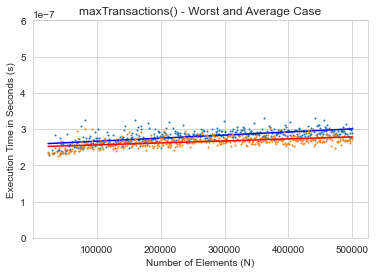

Average Case
y = 8.523438092262624e-14x + 2.579555277896171e-07
Worst Case
y = 5.5007918940734596e-14x + 2.508151555258335e-07


In [34]:

# Max

plt.title("maxTransactions() - Worst and Average Case")
plt.xlabel("Number of Elements (N)")
plt.ylabel("Execution Time in Seconds (s)")


def func(x, a, b):
    return  a * x + b

def initNewX():
    new_x = []
    current = 0
    while current <= target:
        current += 1000
        new_x.append(current)
    return new_x

def initNewY(x_data, a, b):
    new_y = []
    for x in x_data:
        y = func(x, a, b)
        new_y.append(y)
    return new_y

# Average Case Line

x_values_ac = averageCasePlottingData[2][0]
y_values_ac = averageCasePlottingData[2][1]

popt_ac, _ = curve_fit(func, x_values_ac, y_values_ac) # we ignore the covariance matrix for the estimated parameters
a_ac, b_ac = popt_ac
x_new_ac = initNewX()
y_new_ac = initNewY(x_new_ac, a_ac, b_ac)

x_line_ac = np.arange(min(x_values_ac), max(x_values_ac), 1)
y_line_ac = func(x_line_ac, a_ac, b_ac)


# Worst Case Line

x_values_wc = worstCasePlottingData[2][0]
y_values_wc = worstCasePlottingData[2][1]

popt_wc, _ = curve_fit(func, x_values_wc, y_values_wc) # we ignore the covariance matrix for the estimated parameters
a_wc, b_wc = popt_wc
x_new_wc = initNewX()
y_new_wc = initNewY(x_new_wc, a_wc, b_wc)

x_line_wc = np.arange(min(x_values_wc), max(x_values_wc), 1)
y_line_wc = func(x_line_ac, a_wc, b_wc)

plt.ylim(0, 0.0000006)
plt.plot(x_values_ac, y_values_ac, ls="", marker=".", markerfacecolor = "blue", markersize = 2)
plt.plot(x_line_ac, y_line_ac, "-", color="blue")
plt.plot(x_values_wc, y_values_wc, ls="", marker=".", markerfacecolor = "red", markersize = 2)
plt.plot(x_line_wc, y_line_wc, "-", color="red")

plt.show()

print("Average Case")
print("y = " + str(a_ac) + "x + " + str(b_ac))

print("Worst Case")
print("y = " + str(a_wc) + "x + " + str(b_wc))

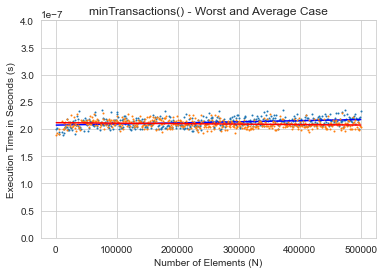

Average Case
y = 2.0348858643233396e-14x + 2.0731504358055545e-07
Worst Case
y = -8.72115660589122e-15x + 2.1178677674946605e-07


In [35]:

# Min

plt.title("minTransactions() - Worst and Average Case")
plt.xlabel("Number of Elements (N)")
plt.ylabel("Execution Time in Seconds (s)")


def func(x, a, b):
    return  a * x + b

def initNewX():
    new_x = []
    current = 0
    while current <= target:
        current += 1000
        new_x.append(current)
    return new_x

def initNewY(x_data, a, b):
    new_y = []
    for x in x_data:
        y = func(x, a, b)
        new_y.append(y)
    return new_y

# Average Case Line

x_values_ac = averageCasePlottingData[3][0]
y_values_ac = averageCasePlottingData[3][1]

popt_ac, _ = curve_fit(func, x_values_ac, y_values_ac) # we ignore the covariance matrix for the estimated parameters
a_ac, b_ac = popt_ac
x_new_ac = initNewX()
y_new_ac = initNewY(x_new_ac, a_ac, b_ac)

x_line_ac = np.arange(min(x_values_ac), max(x_values_ac), 1)
y_line_ac = func(x_line_ac, a_ac, b_ac)


# Worst Case Line

x_values_wc = worstCasePlottingData[3][0]
y_values_wc = worstCasePlottingData[3][1]

popt_wc, _ = curve_fit(func, x_values_wc, y_values_wc) # we ignore the covariance matrix for the estimated parameters
a_wc, b_wc = popt_wc
x_new_wc = initNewX()
y_new_wc = initNewY(x_new_wc, a_wc, b_wc)

x_line_wc = np.arange(min(x_values_wc), max(x_values_wc), 1)
y_line_wc = func(x_line_ac, a_wc, b_wc)

plt.ylim(0, 0.0000004)
plt.plot(x_values_ac, y_values_ac, ls="", marker=".", markerfacecolor = "blue", markersize = 2)
plt.plot(x_line_ac, y_line_ac, "-", color="blue")
plt.plot(x_values_wc, y_values_wc, ls="", marker=".", markerfacecolor = "red", markersize = 2)
plt.plot(x_line_wc, y_line_wc, "-", color="red")

plt.show()

print("Average Case")
print("y = " + str(a_ac) + "x + " + str(b_ac))

print("Worst Case")
print("y = " + str(a_wc) + "x + " + str(b_wc))

/var/folders/v_/cyb366v93q5ccg7bf5s5q8s80000gn/T/ipykernel_3334/2160142240.py:8: RuntimeWarning: invalid value encountered in log
  return  a * np.log(b * x)


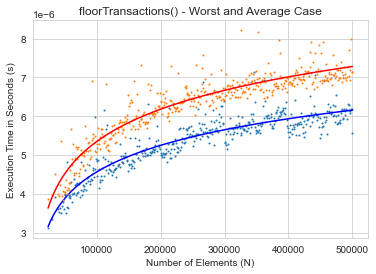

Average Case
y = 9.899966883596857e-07log(0.0010054809070115735)
Worst Case
y = 1.202668061443023e-06log(0.0008540535370017389)


In [36]:

# Floor

plt.title("floorTransactions() - Worst and Average Case")
plt.xlabel("Number of Elements (N)")
plt.ylabel("Execution Time in Seconds (s)")

def func(x, a, b):
    return  a * np.log(b * x) 

def initNewX():
    new_x = []
    current = 0
    while current <= target:
        current += 1000
        new_x.append(current)
    return new_x

def initNewY(x_data, a, b):
    new_y = []
    for x in x_data:
        y = func(x, a, b)
        new_y.append(y)
    return new_y

# Average Case Curve

x_values_ac = averageCasePlottingData[4][0]
y_values_ac = averageCasePlottingData[4][1]

popt_ac, _ = curve_fit(func, x_values_ac, y_values_ac) # we ignore the covariance matrix for the estimated parameters
a_ac, b_ac = popt_ac
x_new_ac = initNewX()
y_new_ac = initNewY(x_new_ac, a_ac, b_ac)

x_line_ac = np.arange(min(x_values_ac), max(x_values_ac), 1)
y_line_ac = func(x_line_ac, a_ac, b_ac)


# Worst Case

x_values_wc = worstCasePlottingData[4][0]
y_values_wc = worstCasePlottingData[4][1]

popt_wc, _ = curve_fit(func, x_values_wc, y_values_wc) # we ignore the covariance matrix for the estimated parameters
a_wc, b_wc = popt_wc
x_new_wc = initNewX()
y_new_wc = initNewY(x_new_wc, a_wc, b_wc)

x_line_wc = np.arange(min(x_values_wc), max(x_values_wc), 1)
y_line_wc = func(x_line_ac, a_wc, b_wc)

plt.plot(x_values_ac, y_values_ac, ls="", marker=".", markerfacecolor = "blue", markersize = 2)
plt.plot(x_line_ac, y_line_ac, "-", color="blue")
plt.plot(x_values_wc, y_values_wc, ls="", marker=".", markerfacecolor = "red", markersize = 2)
plt.plot(x_line_wc, y_line_wc, "-", color="red")

plt.show()

print("Average Case")
print("y = " + str(a_ac) + "log(" + str(b_ac)+ ")")

print("Worst Case")
print("y = " + str(a_wc) + "log(" + str(b_wc) + ")")

/var/folders/v_/cyb366v93q5ccg7bf5s5q8s80000gn/T/ipykernel_3334/3045183986.py:9: RuntimeWarning: invalid value encountered in log
  return  a * np.log(b * x)


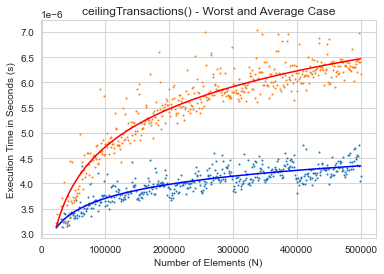

Average Case
y = 3.9929387524169513e-07log(0.10753633106669118)
Worst Case
y = 1.0835883723892153e-06log(0.0007847861879128953)


In [37]:

# Ceiling

plt.title("ceilingTransactions() - Worst and Average Case")
plt.xlabel("Number of Elements (N)")
plt.ylabel("Execution Time in Seconds (s)")


def func(x, a, b):
    return  a * np.log(b * x) 

def initNewX():
    new_x = []
    current = 0
    while current <= target:
        current += 1000
        new_x.append(current)
    return new_x

def initNewY(x_data, a, b):
    new_y = []
    for x in x_data:
        y = func(x, a, b)
        new_y.append(y)
    return new_y

# Average Case Curve

x_values_ac = averageCasePlottingData[5][0]
y_values_ac = averageCasePlottingData[5][1]

popt_ac, _ = curve_fit(func, x_values_ac, y_values_ac) # we ignore the covariance matrix for the estimated parameters
a_ac, b_ac = popt_ac
x_new_ac = initNewX()
y_new_ac = initNewY(x_new_ac, a_ac, b_ac)

x_line_ac = np.arange(min(x_values_ac), max(x_values_ac), 1)
y_line_ac = func(x_line_ac, a_ac, b_ac)


# Worst Case

x_values_wc = worstCasePlottingData[5][0]
y_values_wc = worstCasePlottingData[5][1]

popt_wc, _ = curve_fit(func, x_values_wc, y_values_wc) # we ignore the covariance matrix for the estimated parameters
a_wc, b_wc = popt_wc
x_new_wc = initNewX()
y_new_wc = initNewY(x_new_wc, a_wc, b_wc)

x_line_wc = np.arange(min(x_values_wc), max(x_values_wc), 1)
y_line_wc = func(x_line_ac, a_wc, b_wc)

plt.plot(x_values_ac, y_values_ac, ls="", marker=".", markerfacecolor = "blue", markersize = 2)
plt.plot(x_line_ac, y_line_ac, "-", color="blue")
plt.plot(x_values_wc, y_values_wc, ls="", marker=".", markerfacecolor = "red", markersize = 2)
plt.plot(x_line_wc, y_line_wc, "-", color="red")

plt.show()

print("Average Case")
print("y = " + str(a_ac) + "log(" + str(b_ac)+ ")")

print("Worst Case")
print("y = " + str(a_wc) + "log(" + str(b_wc) + ")")

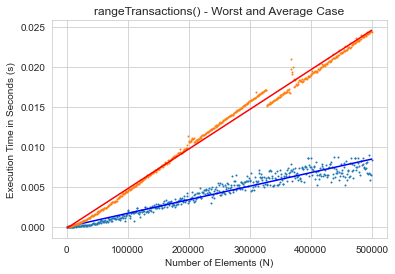

Average Case
y = 1.690693947334287e-08x + 1.4787432644029686e-05
Worst Case
y = 4.9432355429586384e-08x + -0.0001677732175892369


In [38]:

# Range

plt.title("rangeTransactions() - Worst and Average Case")
plt.xlabel("Number of Elements (N)")
plt.ylabel("Execution Time in Seconds (s)")


def func(x, a, b):
    return  a * x + b

def initNewX():
    new_x = []
    current = 0
    while current <= target:
        current += 1000
        new_x.append(current)
    return new_x

def initNewY(x_data, a, b):
    new_y = []
    for x in x_data:
        y = func(x, a, b)
        new_y.append(y)
    return new_y

# Average Case Line

x_values_ac = averageCasePlottingData[6][0]
y_values_ac = averageCasePlottingData[6][1]

popt_ac, _ = curve_fit(func, x_values_ac, y_values_ac) # we ignore the covariance matrix for the estimated parameters
a_ac, b_ac = popt_ac
x_new_ac = initNewX()
y_new_ac = initNewY(x_new_ac, a_ac, b_ac)

x_line_ac = np.arange(min(x_values_ac), max(x_values_ac), 1)
y_line_ac = func(x_line_ac, a_ac, b_ac)


# Worst Case Line

x_values_wc = worstCasePlottingData[6][0]
y_values_wc = worstCasePlottingData[6][1]

popt_wc, _ = curve_fit(func, x_values_wc, y_values_wc) # we ignore the covariance matrix for the estimated parameters
a_wc, b_wc = popt_wc
x_new_wc = initNewX()
y_new_wc = initNewY(x_new_wc, a_wc, b_wc)

x_line_wc = np.arange(min(x_values_wc), max(x_values_wc), 1)
y_line_wc = func(x_line_ac, a_wc, b_wc)

plt.plot(x_values_ac, y_values_ac, ls="", marker=".", markerfacecolor = "blue", markersize = 2)
plt.plot(x_line_ac, y_line_ac, "-", color="blue")
plt.plot(x_values_wc, y_values_wc, ls="", marker=".", markerfacecolor = "red", markersize = 2)
plt.plot(x_line_wc, y_line_wc, "-", color="red")

plt.show()

print("Average Case")
print("y = " + str(a_ac) + "x + " + str(b_ac))

print("Worst Case")
print("y = " + str(a_wc) + "x + " + str(b_wc))